## Notebook import

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from math import log
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline


## Gather data

In [2]:
boston_dataset = load_boston()
boston_dataset.DESCR

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

## Data exploration with pandas datafram

In [3]:
#creating a pandas dataframe
data = pd.DataFrame(data= boston_dataset.data, columns=boston_dataset.feature_names)
data['PRICES'] = boston_dataset.target
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


## cleaning data- checking for missing values


In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## visualizing data- histogram distribution and bar chart

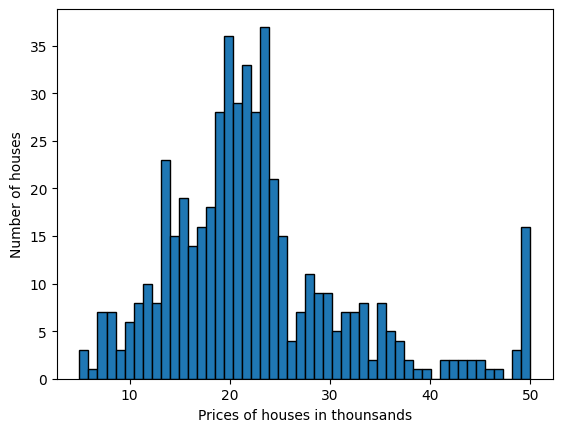

In [5]:

plt.hist(data['PRICES'], bins=50, ec='black')
plt.xlabel('Prices of houses in thounsands')
plt.ylabel('Number of houses')
plt.show()

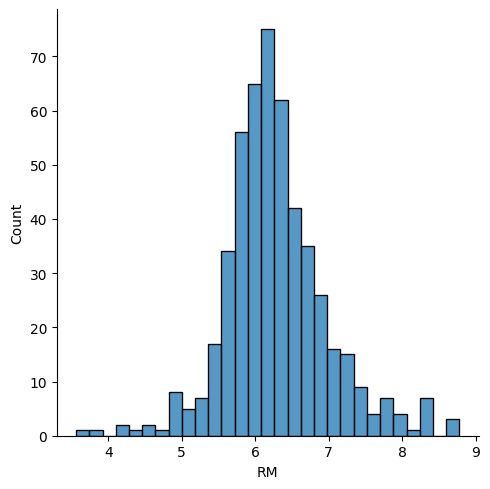

In [6]:
sns.displot(data['RM'], )
plt.show()

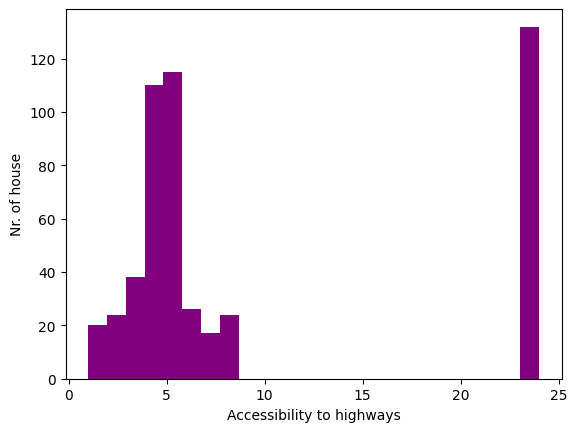

In [7]:

plt.hist(data['RAD'],bins=24, color='purple')
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr. of house')
plt.show()

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')


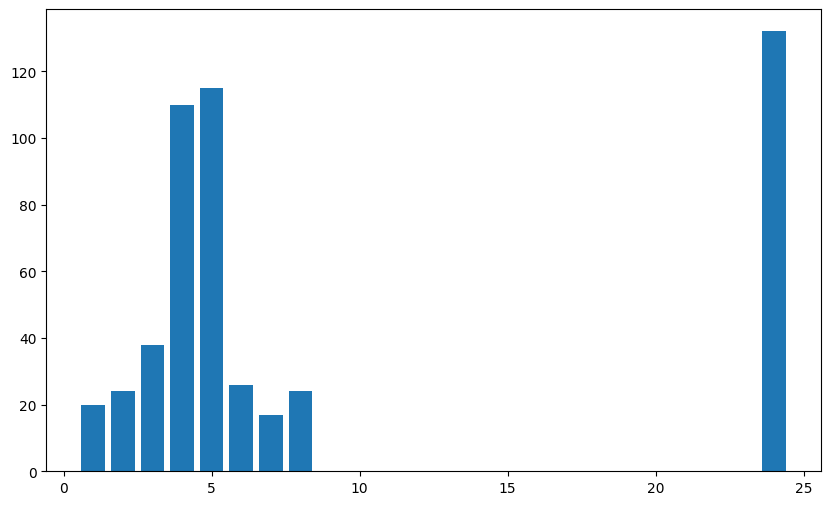

In [8]:
## creating a bar chart
plt.figure(figsize=(10,6))
frequency = data['RAD'].value_counts()
print(frequency.index) 
plt.bar(frequency.index,frequency)
plt.show()


In [9]:
print(data['CHAS'].value_counts())

0.0    471
1.0     35
Name: CHAS, dtype: int64


## Correlation
### $$ \rho _{XY} =CORR(X,Y) $$
### $$ -1.0 \leq \rho _{XY} \leq + 1.0 $$ 

In [10]:
data['PRICES'].corr(data['PTRATIO'])

-0.5077866855375618

In [11]:
 #visualizing correlations with heat map
 #creatin an array of 0 like another

mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

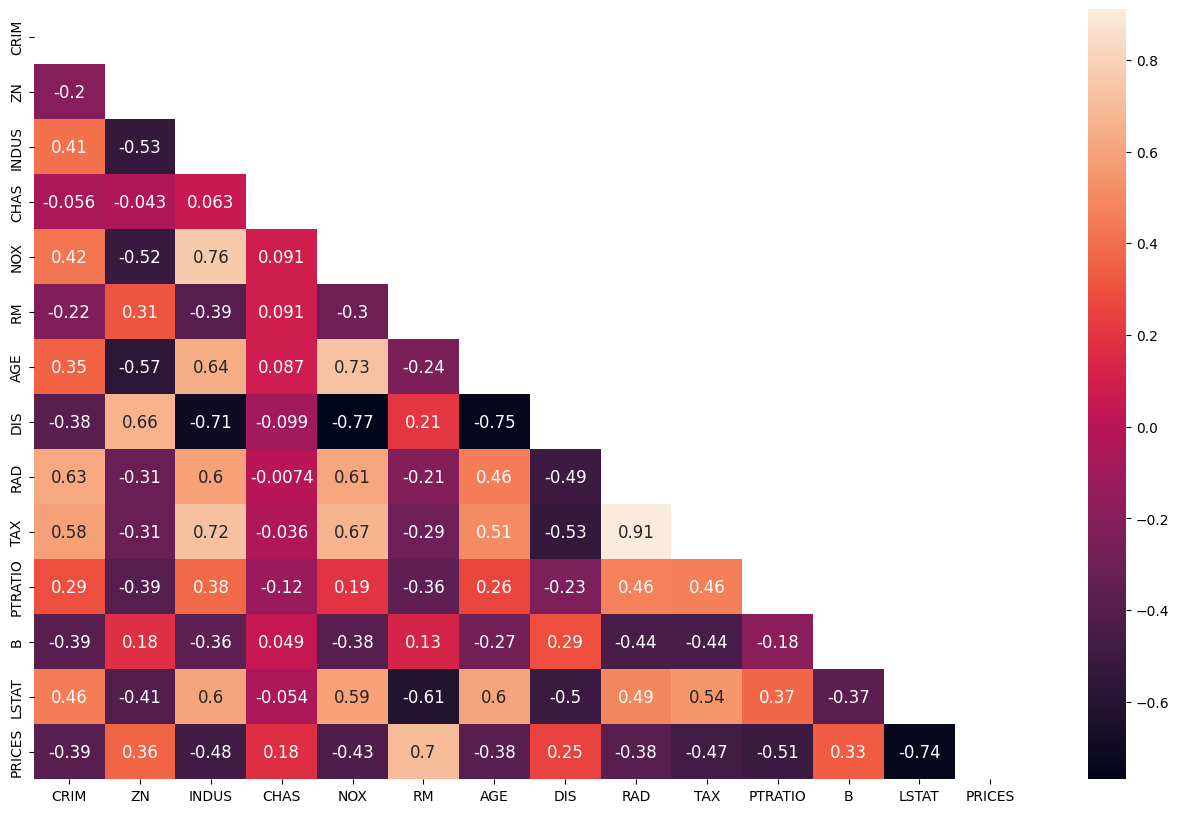

In [12]:
#creating heat map
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask = mask, annot=True, annot_kws={'size':12})
plt.show()

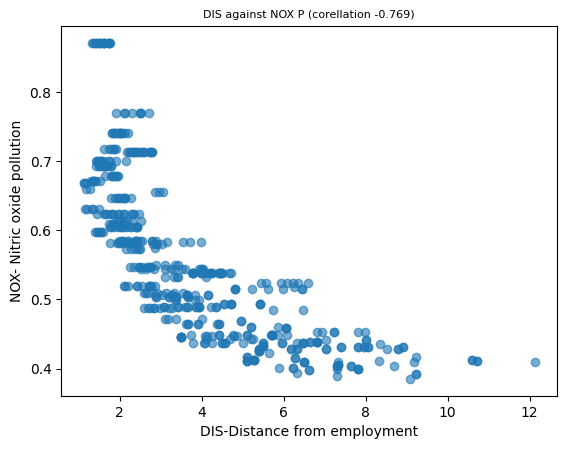

In [13]:
dis_noxcorr= round(data['DIS'].corr(data['NOX']), 3)
plt.scatter(data['DIS'], data['NOX'],alpha= 0.6)
plt.xlabel('DIS-Distance from employment')
plt.title(f'DIS against NOX P (corellation {dis_noxcorr})',fontsize = 8)
plt.ylabel('NOX- Nitric oxide pollution')
plt.show()

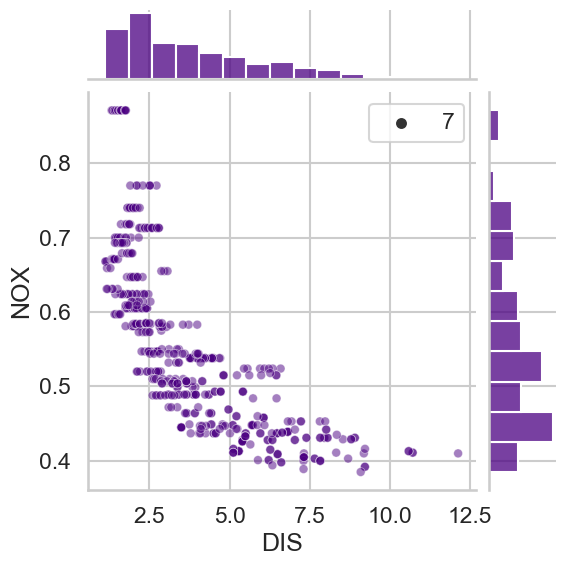

In [14]:
# using seaborn module
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='indigo', size=7,joint_kws={'alpha':0.5})
plt.show()

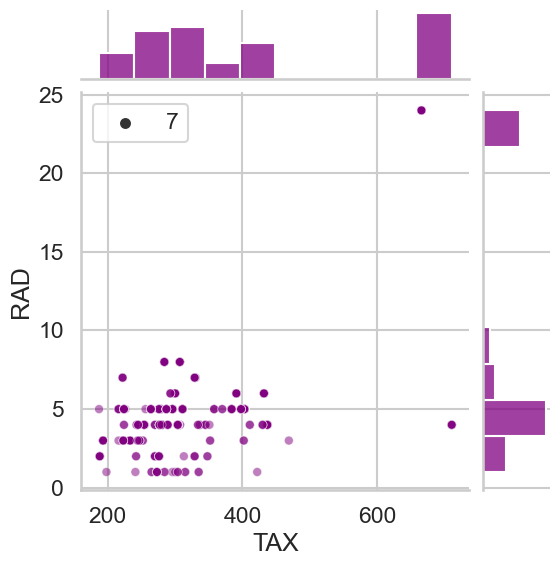

In [15]:
# using seaborn module
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['TAX'], y=data['RAD'], color='purple', size=7,joint_kws={'alpha':0.5})
plt.show()

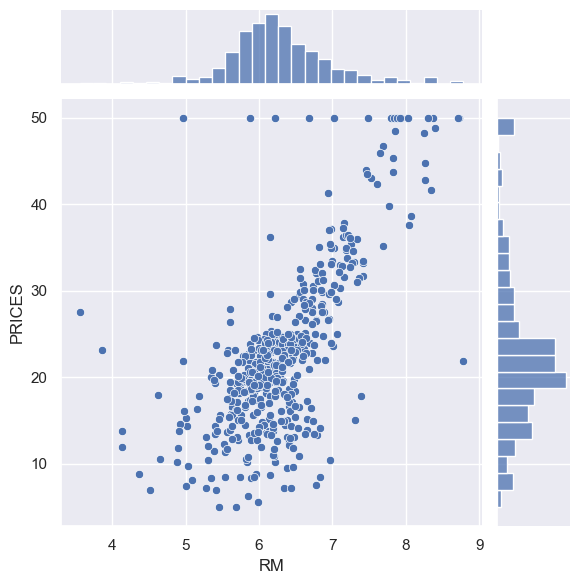

In [16]:
sns.set()
sns.jointplot(x=data['RM'],y=data['PRICES'], )
plt.show()

(506, 14)


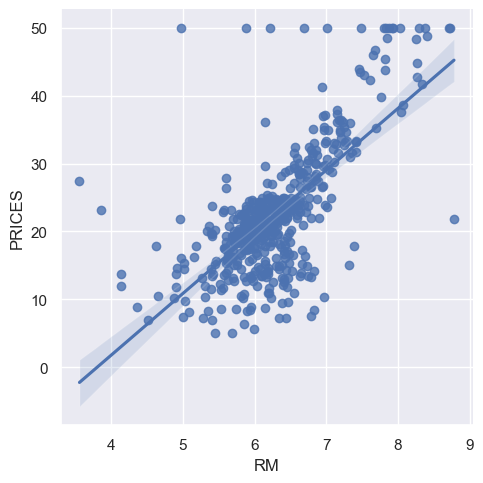

In [17]:
sns.lmplot(x='RM', y='PRICES', data=data)
print(data.shape)

## TESTING AND SPLITTING DATA

In [18]:
prices = data['PRICES']
features = data.drop('PRICES', axis=1)

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)



In [19]:
#running regression non training data
regr = LinearRegression()
regr.fit(X_train, y_train)

intercept = regr.intercept_
coef = pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])
print(intercept)
print(coef)

mean_square_train = regr.score(X_train, y_train)
mean_square_test = regr.score(X_test, y_test)
print(mean_square_train)
print(mean_square_test)

36.5330513828241
              coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626
0.750121534530608
0.6709339839115628


## TRANSFORMING THE DATA FOR MORE ACCURACY



In [20]:
prices = np.log(data['PRICES'])
features = data.drop('PRICES', axis=1)

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

intercept = regr.intercept_
coef = pd.DataFrame(regr.coef_, index=X_train.columns, columns=['coef'])
print(intercept)
print(coef)

mean_square_train = regr.score(X_train, y_train)
mean_square_test = regr.score(X_test, y_test)
print(mean_square_train)


4.059943871775174
             coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390
0.7930234826697584


In [21]:
x_inc_const = sm.add_constant(X_train)
model= sm.OLS(y_train, x_inc_const)
results= model.fit()
pd.DataFrame({'coef':results.params, 'p-value':round( results.pvalues, 3)})


,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [22]:
variance_inflation_factor(exog =x_inc_const, exog_idx=1)

1.7145250443932485

In [23]:
vif = []

for i in range (len(x_inc_const.columns)):
    vif.append(variance_inflation_factor(exog= x_inc_const, exog_idx=i))

print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678575, 3.3267660823099408, 4.222923410477865, 7.314299817005065, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


In [24]:
# creating dataframe

pd.DataFrame({'coef_name':x_inc_const.columns, 'vif': np.around(vif,2)})


,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## MODEL SIMPLIFICATION AND TEH BIC


In [25]:
# original model with log price and all features
x_inc_const = sm.add_constant(X_train)
model= sm.OLS(y_train, x_inc_const)
results= model.fit()
org_coef = pd.DataFrame({'coef':results.params, 'p-value':round( results.pvalues, 3)})

print(f"bic value:{results.bic}")
print(f"rsquared:{results.rsquared}")

bic value:-139.74997769478898
rsquared:0.7930234826697584


In [26]:
# reduced model #1 removinng indus
x_inc_const = sm.add_constant(X_train)
x_inc_const= x_inc_const.drop(["INDUS"], axis =1)
model= sm.OLS(y_train, x_inc_const)
results= model.fit()
coef_minus_indus= pd.DataFrame({'coef':results.params, 'p-value':round( results.pvalues, 3)})

print(f"bic value:{results.bic}")
print(f"rsquared:{results.rsquared}")

bic value:-145.14508855591163
rsquared:0.7927126289415163


In [27]:
# removed model #2 removing age and indus
x_inc_const = sm.add_constant(X_train)
x_inc_const = x_inc_const.drop (['AGE','INDUS'],axis=1)
model= sm.OLS(y_train, x_inc_const)
results= model.fit()
reduced_coef = pd.DataFrame({'coef':results.params, 'p-value':round( results.pvalues, 3)})

print(f"bic value:{results.bic}")
print(f"rsquared:{results.rsquared}")
print(X_train)


bic value:-149.49934294224656
rsquared:0.7918657661852815
         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
50    0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0  243.0   
367  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0  666.0   
34    1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0  307.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0  296.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
320   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0  287.0   
15    0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0  307.0   
484   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0  666.0   
125   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0  188.0   
265   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0  264.0   

     

In [31]:
print(x_inc_const.values)

[[1.00000e+00 8.87300e-02 2.10000e+01 ... 1.68000e+01 3.95560e+02
  1.34500e+01]
 [1.00000e+00 1.35222e+01 0.00000e+00 ... 2.02000e+01 1.31420e+02
  1.33300e+01]
 [1.00000e+00 1.61282e+00 0.00000e+00 ... 2.10000e+01 2.48310e+02
  2.03400e+01]
 ...
 [1.00000e+00 2.37857e+00 0.00000e+00 ... 2.02000e+01 3.70730e+02
  1.33400e+01]
 [1.00000e+00 1.69020e-01 0.00000e+00 ... 1.91000e+01 3.85020e+02
  1.48100e+01]
 [1.00000e+00 7.61620e-01 2.00000e+01 ... 1.30000e+01 3.92400e+02
  1.04500e+01]]


In [32]:
frames = [org_coef,coef_minus_indus,reduced_coef]
pd.concat(frames,axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## RESIDUAL AND RESIDUAL PLOT

In [33]:
#Modified model transformed(using log) and simplified (dropping two features)
prices = np.log(data['PRICES'])
features = data.drop(['PRICES','AGE','INDUS'], axis=1)

#splitting our data
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)
regr = LinearRegression()
regr.fit(X_train, y_train)
#using stats model
x_inc_const = sm.add_constant(X_train)
model= sm.OLS(y_train, x_inc_const)
results= model.fit()

#results.resid
#plotting actual vs prdicted prices


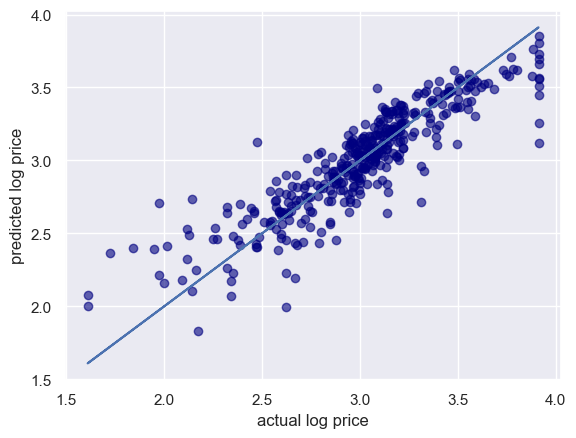

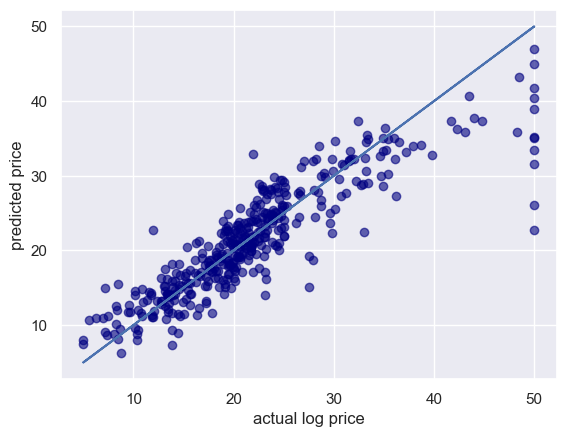

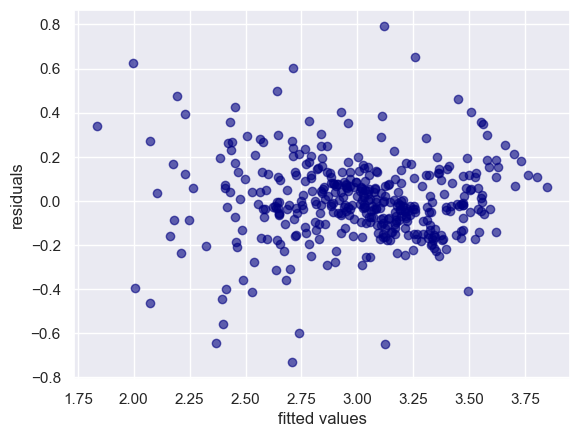

In [34]:
# Graph of actual vs predicted
corr = round(y_train.corr(results.fittedvalues),2)
plt.scatter(y_train, results.fittedvalues, c="navy", alpha=0.6)
plt.xlabel('actual log price')
plt.ylabel('predicted log price')
plt.plot(y_train, y_train)
plt.show()


plt.scatter(np.e**y_train, np.e**results.fittedvalues, c="navy", alpha=0.6)
plt.xlabel('actual log price')
plt.ylabel('predicted price')
plt.plot(np.e**y_train, np.e**y_train)
plt.show()

#predicted log prices and residuals
plt.scatter(results.fittedvalues,results.resid,c="navy", alpha=0.6)
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()
